In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
#mac 上安装xgboost:conda install py-xgboost
from sklearn.metrics import accuracy_score,auc,classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

### 特征简介
Listing of attributes:

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 
1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [2]:
feature=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
         'race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']
class_feature=['workclass','education','marital-status','occupation',
              'relationship','race','sex','native-country','label']

In [4]:
data=pd.read_csv('adult.data',names=feature)
test=pd.read_csv('adult.test',names=feature)
test_data=test.drop(0).reset_index()
test_data=test_data.drop('index',axis=1)

In [5]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


### 清洗数据 Data cleaning
#### 这里需要声明一下：在数据预处理过程中，各数据包含？符号（费了老大劲搞明白这是什么东西），为不影响分类效果，猜测是缺失值，选择去除缺失值

In [7]:
'''
for i in range(len(test_data)):
    for name in class_feature:
        test_data.loc[i,name]=test_data.loc[i,name].strip()#去除字符串中的空格
test_data
'''

'\nfor i in range(len(test_data)):\n    for name in class_feature:\n        test_data.loc[i,name]=test_data.loc[i,name].strip()#去除字符串中的空格\ntest_data\n'

In [8]:
print(' ?' in test_data.iloc[4,:].values)

True


In [9]:
#test中存在’‘
l = len(test_data)
list_ = []
for i in range(l):
    if ' ?' in test_data.iloc[i,:].values:
        list_.append(i)
len(list_)

1221

In [10]:
c = len(data)
list_d = []
for i in range(c):
    if ' ?' in data.iloc[i,:].values:
        list_d.append(i)
len(list_d)

2399

In [12]:
data_test=test_data.drop(list_,axis=0).reset_index().drop('index',axis=1)
data_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
15056,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
15057,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
15058,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [13]:
data_train=data.drop(list_d,axis=0).reset_index().drop('index',axis=1)
data_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 本模型采用树模型，对类别特征的处理方式采用labelencoder进行分类
### classify data by tree model.

In [17]:
#需要做类别处理的特征
for class_ in class_feature:
    encoder = LabelEncoder() 
    data_train[class_]=encoder.fit_transform(data_train[class_].values)
    print(encoder.classes_)
    #test_data[class_] = encoder.transform(test_data[class_].values)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba' ' Dominican-Republic'
 ' Ecuador' ' El-Salvador' ' England' ' France' ' Germany' ' Greece'
 ' Guatemala'

In [15]:
for class_ in class_feature:
    encoder = LabelEncoder() 
    data_test[class_] = encoder.fit_transform(data_test[class_].values)
    print(encoder.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba' ' Dominican-Republic'
 ' Ecuador' ' El-Salvador' ' England' ' France' ' Germany' ' Greece'
 ' Guatemala'

In [18]:
data_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
30158,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
30159,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
30160,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [19]:
data_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37,0
2,28,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,1
3,44,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37,1
4,34,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,245211.0,9,13.0,4,9,3,4,1,0.0,0.0,40.0,37,0
15056,39,2,215419.0,9,13.0,0,9,1,4,0,0.0,0.0,36.0,37,0
15057,38,2,374983.0,9,13.0,2,9,0,4,1,0.0,0.0,50.0,37,0
15058,44,2,83891.0,9,13.0,0,0,3,1,1,5455.0,0.0,40.0,37,0


In [33]:
from sklearn.model_selection import train_test_split
train_x=data_train.iloc[:,:14]
train_y=data_train.iloc[:,14]
x_train, x_val, y_train, y_val = train_test_split(train_x,train_y,test_size = 0.2,random_state=22)

In [52]:
x_test=data_test.iloc[:,:14]
y_test=data_test.iloc[:,14]

In [59]:
#转化数据类型（训练集，验证集，测试集的数据类型要保持一致）
x_test.dtypes
x_test=x_test.astype('int64')

In [61]:
y_test.dtypes

dtype('int64')

 ## 默认参数模型-xgboost

In [38]:
#简单模型
xgboost_model = XGBClassifier()
eval_set = [(x_val,y_val)]
xgboost_model.fit(x_train, 
                  y_train, 
                  early_stopping_rounds=10, 
                  #eval_metric="logloss",  # 损失函数的类型，分类一般都是用对数作为损失函数
                  eval_set=eval_set,
                  verbose=False)

/Users/MC/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
# xgboost的结果是每一个样本属于第一类的概率，要使用round将其转换为0 1值
print('在验证集上的准确率')
y_pred = xgboost_model.predict(x_val)
predictions = [round(i) for i in y_pred] 
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_val, predictions))

在验证集上的准确率
Accuracy: 86.79%
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4563
           1       0.77      0.65      0.71      1470

    accuracy                           0.87      6033
   macro avg       0.83      0.79      0.81      6033
weighted avg       0.86      0.87      0.86      6033



In [51]:
print('在训练集上的准确率')
y_pred = xgboost_model.predict(x_train)
predictions = [round(i) for i in y_pred] 
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_train, predictions))

在训练集上的准确率
Accuracy: 89.14%
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     18091
           1       0.83      0.71      0.76      6038

    accuracy                           0.89     24129
   macro avg       0.87      0.83      0.85     24129
weighted avg       0.89      0.89      0.89     24129



In [62]:
print('在测试集上的准确率')
y_pred = xgboost_model.predict(x_test)
predictions = [round(i) for i in y_pred] 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, predictions))

在测试集上的准确率
Accuracy: 86.68%
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     11360
           1       0.80      0.61      0.69      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.78      0.80     15060
weighted avg       0.86      0.87      0.86     15060



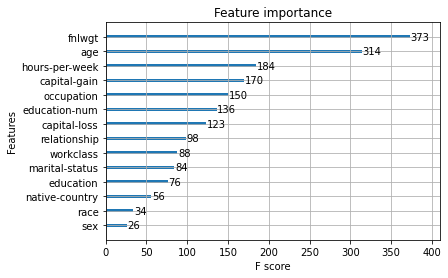

In [ ]:
# feature_importance
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgboost_model)
pyplot.show()
#对于树模型来说，取值区间越大的重要性偏高，这能认为是一个bug么？

### Tuning by gridsearch
调整参数
下面是三个超参数的一般实践最佳值，可以先将它们设定为这个范围，然后画出 learning curves，再调解参数找到最佳模型：

learning_rate ＝ 0.1 或更小，越小就需要多加入弱学习器； 
tree_depth ＝ 2～8；
subsample ＝ 训练集的 30%～80%；

接下来我们用 GridSearchCV 来进行调参会更方便一些： 可以调的超参数组合有：
树的个数和大小 (n_estimators and max_depth).
学习率和树的个数 (learning_rate and n_estimators).
行列的 subsampling rates (subsample, colsample_bytree and colsample_bylevel).

In [64]:
# 通过循遍历的方式，在不同的学习率的情况下，看哪个学习率的情况下，模型最优
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train,y_train)

# 输出最佳学习率和其对应的分数
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# 打印出每一个学习率对应的分数
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/MC/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.284744 using {'learning_rate': 0.2}
-0.687440 (0.000059) with: {'learning_rate': 0.0001}
-0.640733 (0.000569) with: {'learning_rate': 0.001}
-0.412198 (0.002783) with: {'learning_rate': 0.01}
-0.284967 (0.005637) with: {'learning_rate': 0.1}
-0.284744 (0.006119) with: {'learning_rate': 0.2}
-0.288554 (0.007212) with: {'learning_rate': 0.3}


In [65]:
#树的最大深度调参寻优
model = XGBClassifier()
max_depth = [5, 6, 7,8]
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=4, cv=kfold)
grid_result = grid_search.fit(x_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/MC/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:05:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.285453 using {'max_depth': 5}


In [67]:
#树的最大深度调参寻优
model = XGBClassifier()
subsample = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=4, cv=kfold)
grid_result = grid_search.fit(x_train,y_train)

# 输出最佳学习率和其对应的分数
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/MC/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.288554 using {'subsample': 1}


In [68]:
model = XGBClassifier()
n_estimators = [100,200,300,400,500]
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=4, cv=kfold)
grid_result = grid_search.fit(x_train,y_train)

# 输出最佳学习率和其对应的分数
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/MC/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:22:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.288554 using {'n_estimators': 100}


### 调参后的模型

In [116]:

xgboost_model = XGBClassifier(max_depth=7,subsample=1,learning_rate=0.1,n_estimators=1000,eval_metric='auc',scale_pos_weight=1)
eval_set = [(x_val,y_val)]
xgboost_model.fit(x_train, 
                  y_train,
                  early_stopping_rounds=10, 
                  eval_set=eval_set,
                  verbose=False)

/Users/MC/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [117]:
print('在训练集上的准确率')
y_pred = xgboost_model.predict(x_train)
predictions = [round(i) for i in y_pred] 
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_train, predictions))


print('在验证集上的准确率')
y_pred = xgboost_model.predict(x_val)
predictions = [round(i) for i in y_pred] 
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_val, predictions))

print('在测试集上的准确率')
y_pred = xgboost_model.predict(x_test)
predictions = [round(i) for i in y_pred] 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, predictions))

在训练集上的准确率
Accuracy: 89.37%
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     18091
           1       0.84      0.71      0.77      6038

    accuracy                           0.89     24129
   macro avg       0.87      0.83      0.85     24129
weighted avg       0.89      0.89      0.89     24129

在验证集上的准确率
Accuracy: 86.54%
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4563
           1       0.76      0.66      0.70      1470

    accuracy                           0.87      6033
   macro avg       0.83      0.80      0.81      6033
weighted avg       0.86      0.87      0.86      6033

在测试集上的准确率
Accuracy: 86.81%
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11360
           1       0.78      0.64      0.70      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.79      0.81    

### 一句话总结：数据量级不太大的情况下，不如瞎调参